## Image Classification using Deep Learning

### Aim: 

##### With the Chest X - Ray dataset, develop a Deep Learning Model to classify the X Rays of Healthy vs Corona positive patients.

### Objectives/Exercises:

##### 1. Import the dataset in python Notebook
##### 2. Explore the dataframe
##### 3. Perform data transformation to preprocess the images to convert the images to the same size and greyscale.
##### 4. Perform normalization techniques on the images
##### 5. Split the dataset into training and testing sets.
##### 6. Create a Convolution Neural Network (CNN) model to classify the images into positive and negative COVID-19 infections.
##### 7. Test the CNN model and critically evaluate the performance of the model


# Dataset Creation

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
# Defining the categories in a list
CATEGORIES = ['Covid19 Negative', 'Covid19 Positive']

In [3]:
# Speficying the path to the dataset
DIRECTORY = r'C:\Users\preet\Desktop\Virtual Internships\VIP AINE AI\Image Classification with Deep Learning\Covid Dataset'

## Image Preprocessing 

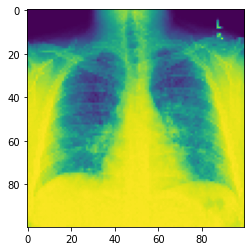

In [4]:
# We specify the image size as 100 since we are resizing the images to 100 by 100
img_size=100
for category in CATEGORIES: # Iterating over the images in both folders of the dataset
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category) # Taking the label of Covid negative images as 0 and Covid positive images as 1
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Converting the images to grayscale
        new_arr = cv2.resize(arr, (img_size,img_size)) # Resizing the images to 100 by 100
        plt.imshow(new_arr)
        break
        

In [5]:
data = []

# Same logic except we use try and except blocks for exception handling
# and we store the image information and corresponding label in a list called 'data'
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category) # path of dataset
    for img in os.listdir(path):
        try:
            img_path = os.path.join(path, img) #Getting the image path
            label = CATEGORIES.index(category)# Assigning label to image
            arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Converting image to grey scale
            new_arr = cv2.resize(arr, (100, 100)) # Resize image
            data.append([new_arr, label]) # appedning image and label in list
        except Exception as e:
            print(str(e))

In [6]:
# We store image information in X and corresponding label in y. We extract this information from the 'data' list
X = []
y = []

In [7]:
for features, label in data:
    X.append(features)  # Storing Images all images in X
    y.append(label) # Storing al image label in y

In [8]:
# Converting it into Numpy Array
X = np.array(X) 
y = np.array(y)

In [9]:
# We have a total of 2,271 images of 100 by 100 size
X.shape

(2271, 100, 100)

In [10]:
import pickle


In [11]:
# We use pickle to store X and y as pkl files
# We specify 'wb' for write binary

pickle.dump(X, open('X.pkl', 'wb'))#save
pickle.dump(y, open('y.pkl', 'wb'))#save

# Training

In [12]:
import pickle
import cv2
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D

In [13]:
X = pickle.load(open('X.pkl', 'rb')) # loading preproccesed images
y = pickle.load(open('y.pkl', 'rb'))# loading Labels

In [14]:
y

array([0, 0, 0, ..., 1, 1, 1])

Here 0 represents the label of Covid-19 negative images and 1 is the label of Covid-19 positive images

In [15]:
X = X/255 # normalizing images 

In [16]:
X = X.reshape(-1, 100, 100, 1) # reshaping it for CNN

In [17]:
# Designing CNN
# By creating a sequential model, the layers of the model will be arranged sequentially
model = Sequential() 

# CNN layers
model.add(Conv2D(64, (3,3), activation = 'relu')) 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

# Hidden Layers
model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dropout(0.5)) # Dropout is used to avoid overfitting

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(2, activation = 'softmax')) # We specify 2 since we have 2 classes

In [18]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(X,y,test_size=0.1)

In [19]:
# adam is a popular optimizer
# Since we use softmax as the activation function of the output layer, we use sparse_categorical_crossentropy as the loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_data,train_target,epochs=15)

Epoch 1/15
64/64 [==============================] - 25s 389ms/step - loss: 0.4869 - accuracy: 0.7264
Epoch 2/15
64/64 [==============================] - 22s 337ms/step - loss: 0.1871 - accuracy: 0.9393
Epoch 3/15
64/64 [==============================] - 22s 344ms/step - loss: 0.1192 - accuracy: 0.9633
Epoch 4/15
64/64 [==============================] - 29s 447ms/step - loss: 0.1003 - accuracy: 0.9706
Epoch 5/15
64/64 [==============================] - 31s 493ms/step - loss: 0.0854 - accuracy: 0.9716
Epoch 6/15
64/64 [==============================] - 28s 438ms/step - loss: 0.0666 - accuracy: 0.9804
Epoch 7/15
64/64 [==============================] - 30s 471ms/step - loss: 0.0572 - accuracy: 0.9819
Epoch 8/15
64/64 [==============================] - 30s 466ms/step - loss: 0.0429 - accuracy: 0.9853
Epoch 9/15
64/64 [==============================] - 28s 442ms/step - loss: 0.0388 - accuracy: 0.9863
Epoch 10/15
64/64 [==============================] - 27s 420ms/step - loss: 0.0377 - accura

In [21]:
print(model.evaluate(test_data,test_target))# evaluate test data


8/8 [==============================] - 1s 62ms/step - loss: 0.0745 - accuracy: 0.9825
[0.07447434216737747, 0.9824561476707458]


We are getting around 98% accuracy on the testing data

In [22]:
model.save(r'Covid_model') #saved the  model

INFO:tensorflow:Assets written to: Covid_model\assets


# Prediction

In [23]:
import numpy as np
CATEGORIES = ['Covid19 Negative', 'Covid19 Positive']

# Defining a function to perform image preprocessing similar to what we did on the dataset
def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (100, 100))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 100, 100, 1)
    return new_arr


model = tf.keras.models.load_model(r'Covid_model')

In [26]:
prediction = model.predict([image(r'C:\Users\preet\Desktop\Virtual Internships\VIP AINE AI\Image Classification with Deep Learning\SampleNegativeImage.jpeg')])
print(CATEGORIES[prediction.argmax()])

Covid19 Negative


The model has correctly predicted that the image belongs to Covid19 Negative

In [27]:
prediction

array([[1., 0.]], dtype=float32)

In [32]:
prediction2 = model.predict([image(r'C:\Users\preet\Desktop\Virtual Internships\VIP AINE AI\Image Classification with Deep Learning\SamplePositiveImage.png')])
print(CATEGORIES[prediction2.argmax()])

Covid19 Positive


In [33]:
prediction2

array([[0., 1.]], dtype=float32)

The model has correctly predicted that the image belongs to Covid19 Positive